In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import datetime
import calendar

In [13]:
data = pd.read_csv('091120.csv')

In [16]:
data.describe()

,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,Unnamed: 16
count,7.140000e+03,7.139000e+03,7140.000000,3.000000e+00
mean,6.528617e+03,1.315585e+04,0.310924,2.615870e+06
std,3.223561e+04,6.647644e+04,0.462904,4.227733e+06
min,0.000000e+00,0.000000e+00,0.000000,2.115331e+01
25%,0.000000e+00,8.000000e+02,0.000000,1.771306e+05
50%,3.750000e+02,3.000000e+03,0.000000,3.542400e+05
75%,3.625500e+03,9.530000e+03,1.000000,3.923795e+06
max,1.562500e+06,3.400000e+06,1.000000,7.493350e+06


In [ ]:
data.columns

In [38]:
data['Opportunity: Gross Amount'].std()

48385.543935080044

In [39]:
gross_missing = data['Opportunity: Close Date'].isnull().sum()
print('gross amount missing: ' + str(gross_missing))

gross amount missing: 0


In [41]:
data['Opportunity: Close Date'].head()

0    6/24/2020
1    5/19/2020
2     7/1/2020
3    6/23/2020
4    7/26/2020
Name: Opportunity: Close Date, dtype: object

In [42]:
data[data['Opportunity: Gross Amount']==0].count()


Opportunity: Stage                                       884
Opportunity: Opportunity Owner: Market Division          880
Opportunity: Opportunity Owner: Market Area              880
Opportunity: Opportunity Owner: Home Operating Market    879
Opportunity: Opportunity Owner: Full Name                884
New Business                                             884
Opportunity: Account Name: Account Name                  882
Opportunity: Opportunity Name                            884
Adwire Project ID                                        884
Form Date                                                884
Opportunity: Created Date                                884
Opportunity: Close Date                                  884
Opportunity: Gross Expected Revenue                      884
Opportunity: Gross Amount                                884
Form Created on Closed Opp                               884
Opportunity: Opportunity Owner: Market Type              879
dtype: int64

In [44]:
data['month'] = data.apply(lambda row: row["Opportunity: Close Date"][0], axis=1)

data['month'] = [int(x) for x in data.month]

data.head()

,Opportunity: Stage,Opportunity: Opportunity Owner: Market Division,Opportunity: Opportunity Owner: Market Area,Opportunity: Opportunity Owner: Home Operating Market,Opportunity: Opportunity Owner: Full Name,New Business,Opportunity: Account Name: Account Name,Opportunity: Opportunity Name,Adwire Project ID,Form Date,Opportunity: Created Date,Opportunity: Close Date,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,Opportunity: Opportunity Owner: Market Type,month
0,Closed - Won,NaN,NaN,NaN,James Boyer,New Business,Kansept Transportation,Kansept Tr-McCord-Inside Sales-8381318,A6MmmAHQAAA,6/25/2020 8:46 AM,6/18/2020,6/24/2020,1240.0,1240.0,1,NaN,6
1,Closed - Won,NaN,NaN,NaN,McKenzie Bond,New Business,Peak Fitness Meals,Peak Fitne-Cornthwaite-Inside Sales-8257545,AtxQIAPgAAA,5/18/2020 3:50 PM,5/18/2020,5/19/2020,2500.0,2500.0,0,NaN,5
2,Proposal Built,NaN,NaN,NaN,Jordan Lemire,New Business,The Juicy Seafood,The Juicy -NA-Inside Sales-8388042,A7mgJKIwAAA,6/29/2020 3:03 PM,6/19/2020,7/1/2020,1092.0,3120.0,0,NaN,7
3,Closed - Won,NaN,NaN,NaN,Jordan Lemire,Existing Business,BigMeat&Accciates Catering,BigMeat&Ac-BigMeat&Ac-BigMeat&Ac Sept- -Ford-I...,A6UmXKBAAAA,6/25/2020 5:52 PM,6/23/2020,6/23/2020,1500.0,1500.0,1,NaN,6
4,Product Ideas,NaN,NaN,NaN,Jordan Lemire,New Business,Sunzer0 llc,Sunzer0 ll-Mueses-Inside Sales-8283277,A8N9EBEAAAA,7/1/2020 11:56 AM,5/26/2020,7/26/2020,0.0,0.0,0,NaN,7


In [46]:
#data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [59]:
data = data.sort_values(by=['month'], ascending=True)
data.head()

,Opportunity: Stage,Opportunity: Opportunity Owner: Market Division,Opportunity: Opportunity Owner: Market Area,Opportunity: Opportunity Owner: Home Operating Market,Opportunity: Opportunity Owner: Full Name,New Business,Opportunity: Account Name: Account Name,Opportunity: Opportunity Name,Adwire Project ID,Form Date,Opportunity: Created Date,Opportunity: Close Date,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,Opportunity: Opportunity Owner: Market Type,month
29,Closed - Won,Abromovich,Memphis,JacksonMS,ALMA MCKNIGHT,Existing Business,Born Again Good Antiques,Born Again-Born Again Goods and Antiques-MCKNI...,Ain6YAIgAAA,4/14/2020 8:12 PM,10/22/2019,10/28/2019,9390.0,9390.0,1,Community,1
1324,Closed - Won,Abromovich,Memphis,BiloxiMS,Katherine Walton,Existing Business,GULF COAST VETERINARY EMERGENCY HOSPITAL,"Gulf Coast-Beachview 2020-WALTON, KATHERINE-Bi...",A184BAKQAAA,6/12/2020 11:36 AM,11/20/2019,11/22/2019,5355.0,5355.0,1,Community,1
2621,Qualified (CNA),Abromovich,Pennsylvania,AllentownPA,Julie Samu,Existing Business,Law Offices of Everett Cook,Law Office-Law Office-AllentownPA-SJuli136-SAM...,AtvOrADgAAA,5/18/2020 1:32 PM,5/18/2020,1/2/2021,0.0,0.0,0,Community,1
3256,Closed - Won,Coles,Kentucky,LouisvilleKY,Travis Higdon,Existing Business,ADVANCED ENT AND ALLERGY,Advanced E-Advanced ENT and Allergy 2020 Plan-...,AsFXTABAAAA,5/13/2020 1:05 PM,9/23/2019,11/14/2019,34500.0,34500.0,1,Metro,1
418,Closed - Won,Abromovich,Memphis,TupeloMS,Chris Douglass,Existing Business,Internal Medicine and Pediatrics,Internal M-Q2& Q3 2020 Gabriel-Chris Douglass-...,AyssyCTgAAA,6/2/2020 2:44 PM,10/25/2019,10/25/2019,2994.0,2994.0,1,Community,1


In [60]:
missingrows = pd.isnull(data).sum(axis=1) > 0
missingcols = pd.isnull(data).sum(axis=0) > 0
print('The columns with misssingness are %s' %(data.columns[missingcols]))
data = data[~missingrows]

The columns with misssingness are Index([], dtype='object')


In [49]:
data.corr()

,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,month
Opportunity: Gross Expected Revenue,1.000000,0.803863,0.193244,-0.148835
Opportunity: Gross Amount,0.803863,1.000000,0.041399,-0.030115
Form Created on Closed Opp,0.193244,0.041399,1.000000,-0.474033
month,-0.148835,-0.030115,-0.474033,1.000000


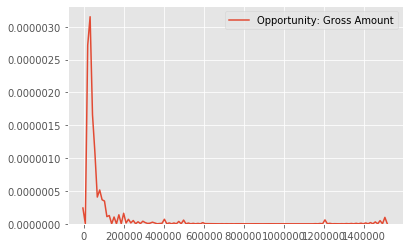

In [50]:
sns.kdeplot(data['Opportunity: Gross Amount'])

([<matplotlib.axis.XTick at 0x7f84ec3779d0>,
  ...],
 <a list of 1595 Text xticklabel objects>)

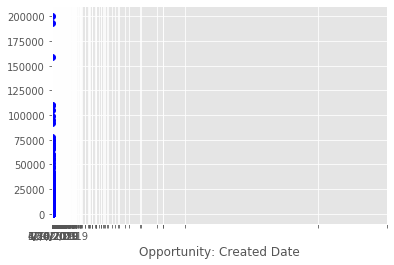

In [51]:
data.groupby('Opportunity: Created Date')['Opportunity: Gross Amount'].mean().plot(style='bo-')
plt.xticks(data['Opportunity: Gross Amount'].unique())

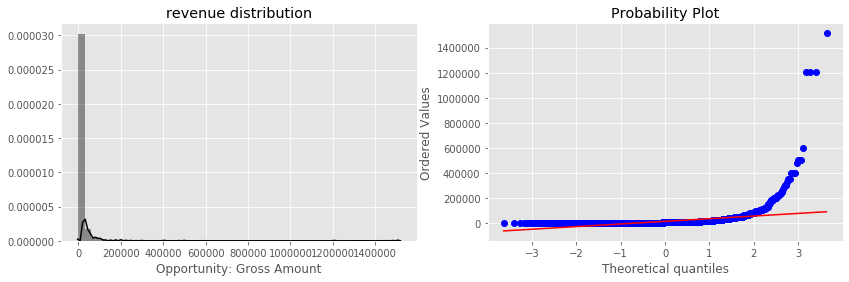

skewness: 18.044387
kurtosis: 451.077247


In [52]:
y = data['Opportunity: Gross Amount']
fig, (ax1, res) = plt.subplots(1,2, figsize = (14, 4))
sns.distplot(y, color = 'black', ax = ax1)
ax1.set_title('revenue distribution')
res = stats.probplot(y, plot=plt)
plt.show()
y_skew, y_kurt = y.skew(), y.kurt()
print('skewness: %f' % y_skew)
print('kurtosis: %f' % y_kurt)

In [53]:
#convert to log

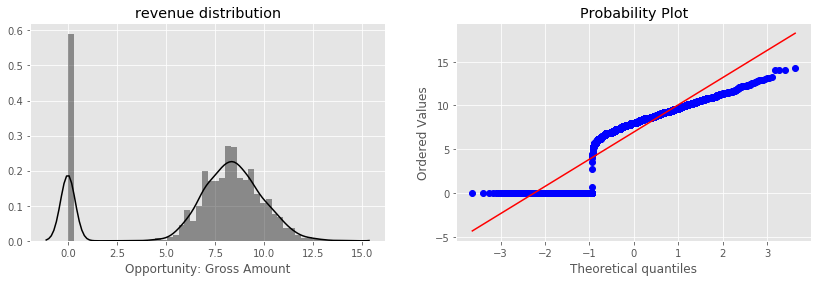

skewness: -1.159333
kurtosis: 0.135911


In [54]:
y = np.log1p(y)
fig, (ax1, res) = plt.subplots(1, 2, figsize = (14, 4))
sns.distplot(y, color = 'black', ax = ax1)
ax1.set_title('revenue distribution')
res = stats.probplot(y, plot = plt)
plt.show()

y_skew, y_kurt = y.skew(), y.kurt()
print('skewness: %f' % y_skew)
print('kurtosis: %f' % y_kurt)

In [55]:
## remove outliers ^^

In [56]:
data.to_csv('ROI_with_month', index = False)

In [29]:
data.loc[data['New Business'] == 'New Business']


,Opportunity: Stage,Opportunity: Opportunity Owner: Market Division,Opportunity: Opportunity Owner: Market Area,Opportunity: Opportunity Owner: Home Operating Market,Opportunity: Opportunity Owner: Full Name,New Business,Opportunity: Account Name: Account Name,Opportunity: Opportunity Name,Adwire Project ID,Form Date,Opportunity: Created Date,Opportunity: Close Date,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,Opportunity: Opportunity Owner: Market Type,month
32,Closed - Won,Abromovich,Memphis,JacksonMS,DEBBIE WESTBROOK,New Business,CANTON TOURISM,CANTON FLE-2020 Balloon Glo Canton Tourism-WES...,A5ofJBmQAAA,6/23/2020 3:40 PM,4/30/2020,6/23/2020,2512.0,2512.0,1,Community,Jun
33,Closed - Won,Abromovich,Memphis,JacksonMS,DEBBIE WESTBROOK,New Business,Cherokee Brick,Cherokee B-Cherokee Brick-WESTBROOK DEBBIE-Jac...,A1rfSAmwAAA,6/11/2020 3:49 PM,6/11/2020,6/12/2020,3012.0,3012.0,0,Community,Jun
35,Closed - Lost,Abromovich,Memphis,JacksonMS,Faye Myles,New Business,Sweetie Pies Frying Bird,Wk-End & Sunday Campaign June-8341702,A1rKHDFwAAA,6/11/2020 3:26 PM,6/10/2020,6/28/2020,0.0,375.0,0,Community,Jun
39,Closed - Won,Abromovich,Memphis,JacksonMS,THOMAS O'BRIEN,New Business,Ace Bolt & Screws CO. INC.,Ace Bolt &-Clark-OBRIEN THOMAS-JackMS-7682546,AxC2ZAJgAAA,5/28/2020 2:18 PM,1/7/2020,5/28/2020,8700.0,8700.0,1,Community,May
40,Closed - Lost,Lankford,Georgia,SavannahGA,Crystal Colson,New Business,Mr. Handyman of Greater Savannah,Mr. Handym-Mr. Handym-SavannahGA-CCrys964-Cols...,A1_ItDegAAA,6/12/2020 2:10 PM,5/19/2020,6/17/2020,0.0,3000.0,0,Community,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5041,Product Ideas,LeGrett,"Los Angeles, CA",RiversideCA,Mike Jouhar,New Business,Dr. OC Plastic Surgery,"Dr. OC Pla--Jouhar, Mike-RiversideCA-8414547",A6dFxDegAAA,6/26/2020 3:31 AM,6/26/2020,6/28/2020,750.0,5000.0,0,Regional,Jun
5042,Proposal Built,Hopeck,"Dallas, TX",DallasTX,Kristie Clanton,New Business,DECA Dental Group,Deca Denta-Branding Campaign - Re-opening-Clan...,A4PyVALwAAA,6/19/2020 10:45 AM,6/15/2020,8/3/2020,7700.0,22000.0,0,Regional,Aug
5044,Closed - Lost,Hopeck,"Dallas, TX",DallasTX,Kristie Clanton,New Business,Raw Fitness,"Raw Fitnes-Andrews-Clanton, Kristie-DallTX-828...",AwrgMCuwAAA,5/27/2020 11:45 AM,5/27/2020,6/10/2020,0.0,2100.0,0,Regional,Jun
5046,Closed - Lost,Hopeck,Boston,BostonMA,Amy Grant,New Business,Rev for Men,"Rev for Me-Keyes-Grant, Amy-BostMA-8296901",A1TnVIegAAA,6/10/2020 12:39 PM,5/28/2020,6/22/2020,0.0,200000.0,0,Regional,Jun


In [30]:
data.head()

,Opportunity: Stage,Opportunity: Opportunity Owner: Market Division,Opportunity: Opportunity Owner: Market Area,Opportunity: Opportunity Owner: Home Operating Market,Opportunity: Opportunity Owner: Full Name,New Business,Opportunity: Account Name: Account Name,Opportunity: Opportunity Name,Adwire Project ID,Form Date,Opportunity: Created Date,Opportunity: Close Date,Opportunity: Gross Expected Revenue,Opportunity: Gross Amount,Form Created on Closed Opp,Opportunity: Opportunity Owner: Market Type,month
29,Closed - Won,Abromovich,Memphis,JacksonMS,ALMA MCKNIGHT,Existing Business,Born Again Good Antiques,Born Again-Born Again Goods and Antiques-MCKNI...,Ain6YAIgAAA,4/14/2020 8:12 PM,10/22/2019,10/28/2019,9390.0,9390.0,1,Community,Jan
30,Closed - Won,Abromovich,Memphis,JacksonMS,ALMA MCKNIGHT,Existing Business,Mazda of Jackson,"Moj, LLC-Mazda of Jackson 2020 Annual-MCKNIGHT...",AjJsqAQAAAA,4/16/2020 10:39 AM,2/4/2020,2/24/2020,49500.0,49500.0,1,Community,Feb
31,Closed - Won,Abromovich,Memphis,JacksonMS,ALMA MCKNIGHT,Existing Business,HINDS COUNTY HUMAN RESOURCE AG,HINDS COUN-Headstart Recruitment-MCKNIGHT ALMA...,AcOzNCEAAAA,3/26/2020 10:44 AM,3/11/2020,5/20/2020,7846.0,7846.0,0,Community,May
32,Closed - Won,Abromovich,Memphis,JacksonMS,DEBBIE WESTBROOK,New Business,CANTON TOURISM,CANTON FLE-2020 Balloon Glo Canton Tourism-WES...,A5ofJBmQAAA,6/23/2020 3:40 PM,4/30/2020,6/23/2020,2512.0,2512.0,1,Community,Jun
33,Closed - Won,Abromovich,Memphis,JacksonMS,DEBBIE WESTBROOK,New Business,Cherokee Brick,Cherokee B-Cherokee Brick-WESTBROOK DEBBIE-Jac...,A1rfSAmwAAA,6/11/2020 3:49 PM,6/11/2020,6/12/2020,3012.0,3012.0,0,Community,Jun
